In [ ]:
!pip install -q kaggle

In [ ]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('username')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [ ]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 76.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bank-customer-churn-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().any()

False

In [ ]:
X = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

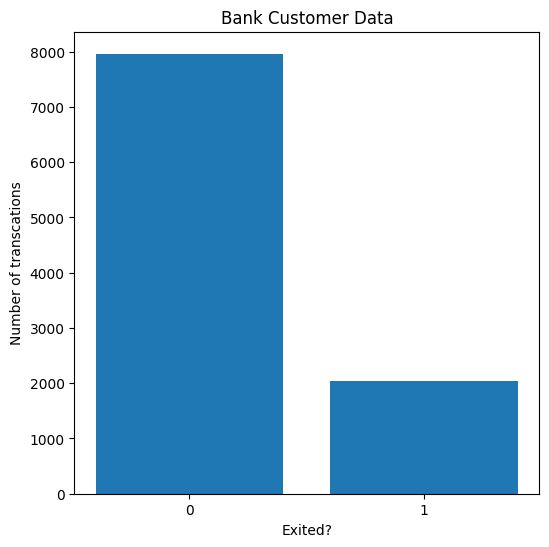

In [ ]:
import matplotlib.pyplot as plt


data = X['Exited'].value_counts()

plt.figure(figsize=(6, 6))

# Bar plot
plt.bar(data.index.astype(str), data)
plt.xlabel('Exited?')
plt.ylabel('Number of transcations')
plt.title('Bank Customer Data')


plt.show()


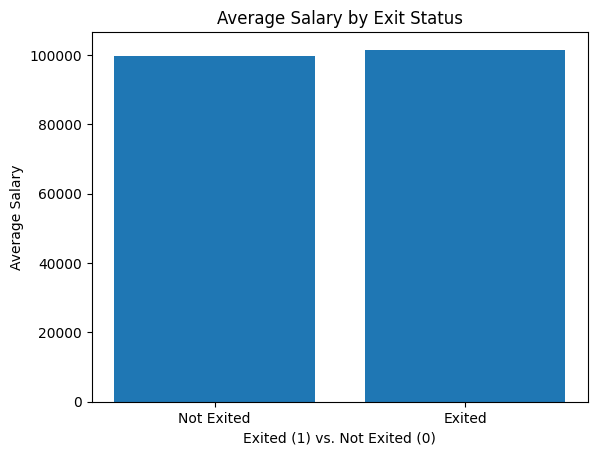

In [ ]:
avg_salary_by_exit = X.groupby('Exited')['EstimatedSalary'].mean()

plt.bar(avg_salary_by_exit.index, avg_salary_by_exit)
plt.xlabel('Exited (1) vs. Not Exited (0)')
plt.ylabel('Average Salary')
plt.xticks(avg_salary_by_exit.index, ['Not Exited', 'Exited'])
plt.title('Average Salary by Exit Status')
plt.show()

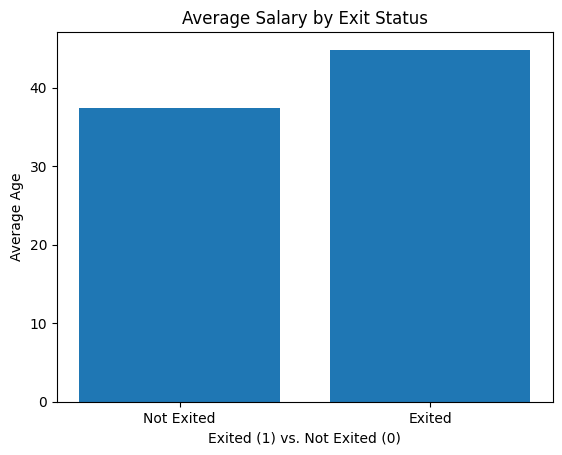

In [ ]:
avg_age_by_exit = X.groupby('Exited')['Age'].mean()

plt.bar(avg_age_by_exit.index, avg_age_by_exit)
plt.xlabel('Exited (1) vs. Not Exited (0)')
plt.ylabel('Average Age')
plt.xticks(avg_salary_by_exit.index, ['Not Exited', 'Exited'])
plt.title('Average Salary by Exit Status')
plt.show()

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()


In [ ]:
X['Geography'] = le.fit_transform(df['Geography'])


In [ ]:
X['Gender'] = le.fit_transform(X['Gender'])

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
A = X.drop(['Exited'],axis=1)

In [ ]:
B = X['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(A,B,train_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

LR = LogisticRegression()
LR.fit(A_train, b_train)
y_pred1 = LR.predict(A_test)


print(classification_report(b_test, y_pred1))
print(confusion_matrix(b_test, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5970
           1       0.39      0.05      0.08      1530

    accuracy                           0.79      7500
   macro avg       0.60      0.51      0.48      7500
weighted avg       0.72      0.79      0.72      7500

[[5863  107]
 [1461   69]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(A_train, b_train)
y_pred2 = rf.predict(A_test)
print(classification_report(b_test, y_pred2))
print(confusion_matrix(b_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5970
           1       0.76      0.41      0.53      1530

    accuracy                           0.85      7500
   macro avg       0.81      0.69      0.72      7500
weighted avg       0.84      0.85      0.83      7500

[[5769  201]
 [ 905  625]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(A_train, b_train)
y_pred3 = dt.predict(A_test)
print(classification_report(b_test, y_pred3))
print(confusion_matrix(b_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5970
           1       0.47      0.45      0.46      1530

    accuracy                           0.79      7500
   macro avg       0.67      0.66      0.66      7500
weighted avg       0.78      0.79      0.78      7500

[[5194  776]
 [ 836  694]]


In [ ]:
## Oversample

In [ ]:
from imblearn.over_sampling import SMOTE
A_res, b_res = SMOTE().fit_resample(A,B)

In [ ]:
b_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
A_res.shape

(15926, 10)

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(A_res,b_res,train_size=0.25)

In [ ]:
LR.fit(A_train, b_train)
y_pred4 = LR.predict(A_test)


print(classification_report(b_test, y_pred4))
print(confusion_matrix(b_test, y_pred4))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      5967
           1       0.65      0.67      0.66      5978

    accuracy                           0.66     11945
   macro avg       0.66      0.66      0.66     11945
weighted avg       0.66      0.66      0.66     11945

[[3841 2126]
 [1971 4007]]


In [ ]:
rf.fit(A_train, b_train)
y_pred5 = rf.predict(A_test)
print(classification_report(b_test, y_pred5))
print(confusion_matrix(b_test, y_pred5))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      5967
           1       0.83      0.84      0.84      5978

    accuracy                           0.84     11945
   macro avg       0.84      0.84      0.84     11945
weighted avg       0.84      0.84      0.84     11945

[[4972  995]
 [ 946 5032]]


In [ ]:
dt.fit(A_train, b_train)
y_pred6 = dt.predict(A_test)
print(classification_report(b_test, y_pred6))
print(confusion_matrix(b_test, y_pred6))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      5967
           1       0.76      0.77      0.77      5978

    accuracy                           0.76     11945
   macro avg       0.76      0.76      0.76     11945
weighted avg       0.76      0.76      0.76     11945

[[4526 1441]
 [1367 4611]]


In [ ]:
##Better Accuracy with RandomForest 84%